In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import calendar
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
import torch.nn.functional as F
from matplotlib import pyplot as plt
from torchsummaryX import summary

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [2]:
df = pd.read_csv("Dataset/train_ML_IOT.csv")

In [3]:
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [4]:
df.DateTime = pd.to_datetime(df.DateTime)
df = df.set_index(df.DateTime)

In [5]:
df = df.drop(['DateTime','ID'],axis=1)

In [6]:
df_1 = df[df['Junction'] == 1].drop('Junction',axis=1)
df_2 = df[df['Junction'] == 2].drop('Junction',axis=1)
df_3 = df[df['Junction'] == 3].drop('Junction',axis=1)
df_4 = df[df['Junction'] == 4].drop('Junction',axis=1)

In [7]:
print('Data for Junction 1 is in range ' + str(df_1.index.min()) + ' - ' + str(df_1.index.max()))
print('Data for Junction 2 is in range ' + str(df_2.index.min()) + ' - ' + str(df_2.index.max()))
print('Data for Junction 3 is in range ' + str(df_3.index.min()) + ' - ' + str(df_3.index.max()))
print('Data for Junction 4 is in range ' + str(df_4.index.min()) + ' - ' + str(df_4.index.max()))

Data for Junction 1 is in range 2015-11-01 00:00:00 - 2017-06-30 23:00:00
Data for Junction 2 is in range 2015-11-01 00:00:00 - 2017-06-30 23:00:00
Data for Junction 3 is in range 2015-11-01 00:00:00 - 2017-06-30 23:00:00
Data for Junction 4 is in range 2017-01-01 00:00:00 - 2017-06-30 23:00:00


In [8]:
# Create DataFrame of date range
dates = pd.date_range('2015-11-01 00:00:00', '2017-06-30 23:00:00',freq='h')

In [9]:
merge_df = pd.DataFrame(dates)
merge_df = merge_df.set_index(dates)

In [10]:
merged_df = pd.merge(merge_df,df_1,how='left',left_index=True,right_index=True).rename(columns={'Vehicles':'Junction_1'})
merged_df = pd.merge(merged_df,df_2,how='left',left_index=True,right_index=True).rename(columns={'Vehicles':'Junction_2'})
merged_df = pd.merge(merged_df,df_3,how='left',left_index=True,right_index=True).rename(columns={'Vehicles':'Junction_3'})
merged_df = pd.merge(merged_df,df_4,how='left',left_index=True,right_index=True).rename(columns={'Vehicles':'Junction_4'})

In [11]:
merged_df.head()

,0,Junction_1,Junction_2,Junction_3,Junction_4
2015-11-01 00:00:00,2015-11-01 00:00:00,15,6,9,NaN
2015-11-01 01:00:00,2015-11-01 01:00:00,13,6,7,NaN
2015-11-01 02:00:00,2015-11-01 02:00:00,10,5,5,NaN
2015-11-01 03:00:00,2015-11-01 03:00:00,7,6,1,NaN
2015-11-01 04:00:00,2015-11-01 04:00:00,9,7,2,NaN


In [12]:
merged_df.drop([0],axis=1,inplace=True)

In [13]:
merged_df.isna().any()

Junction_1    False
Junction_2    False
Junction_3    False
Junction_4     True
dtype: bool

<AxesSubplot:>

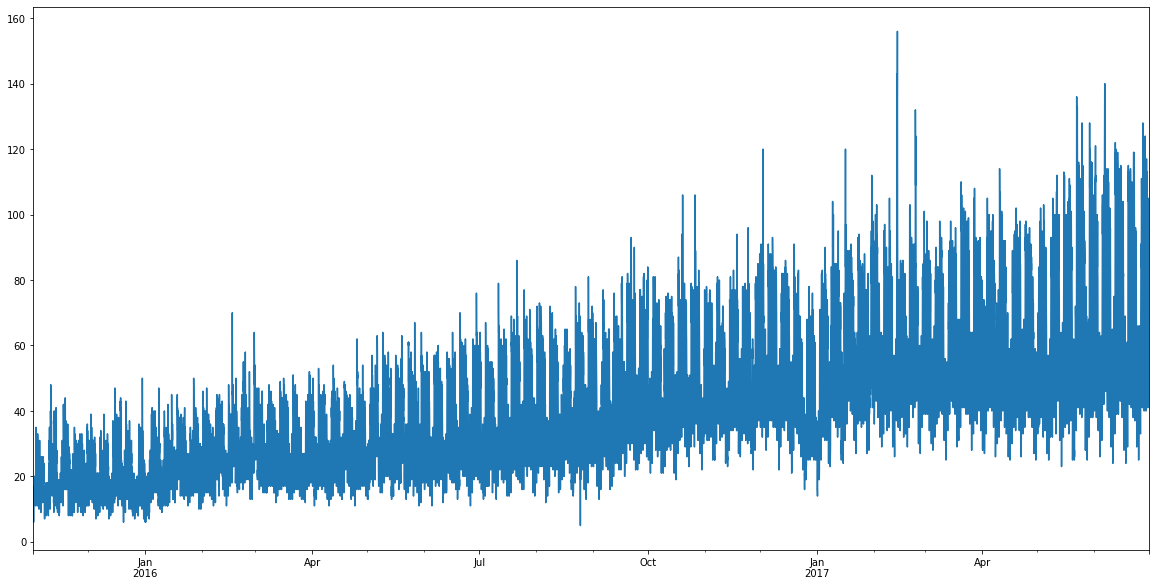

In [14]:
plt.figure(figsize=(20,10))
merged_df['Junction_1'].plot()

<AxesSubplot:>

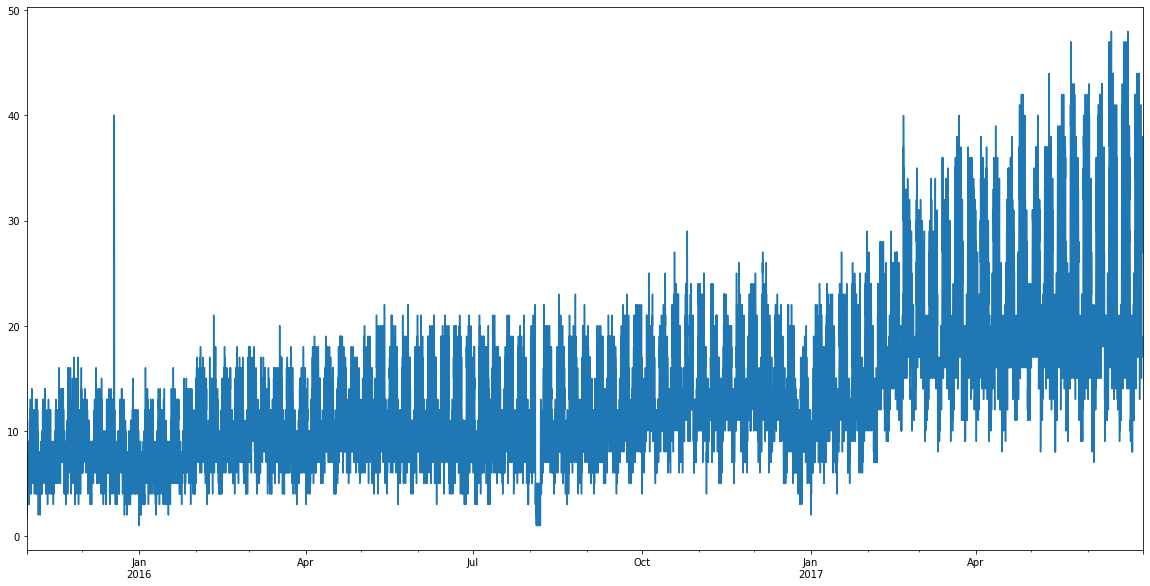

In [15]:
plt.figure(figsize=(20,10))
merged_df['Junction_2'].plot()

In [16]:
merged_df[:2016][merged_df['Junction_2']>30]

<ipython-input-16-02e7d4f61cee>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merged_df[:2016][merged_df['Junction_2']>30]


,Junction_1,Junction_2,Junction_3,Junction_4
2015-12-18 11:00:00,42,34,7,NaN
2015-12-18 12:00:00,43,40,6,NaN
2015-12-18 13:00:00,40,38,7,NaN
2015-12-18 14:00:00,44,38,6,NaN
2015-12-18 15:00:00,44,40,2,NaN
2015-12-18 16:00:00,39,39,4,NaN


In [17]:
merged_df['2015-12-18']

<ipython-input-17-49d643dac71f>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  merged_df['2015-12-18']


,Junction_1,Junction_2,Junction_3,Junction_4
2015-12-18 00:00:00,24,10,4,NaN
2015-12-18 01:00:00,20,9,5,NaN
2015-12-18 02:00:00,17,6,5,NaN
2015-12-18 03:00:00,13,7,5,NaN
2015-12-18 04:00:00,16,4,4,NaN
2015-12-18 05:00:00,15,9,3,NaN
2015-12-18 06:00:00,13,8,3,NaN
2015-12-18 07:00:00,15,6,1,NaN
2015-12-18 08:00:00,16,8,5,NaN
2015-12-18 09:00:00,22,11,5,NaN


<AxesSubplot:>

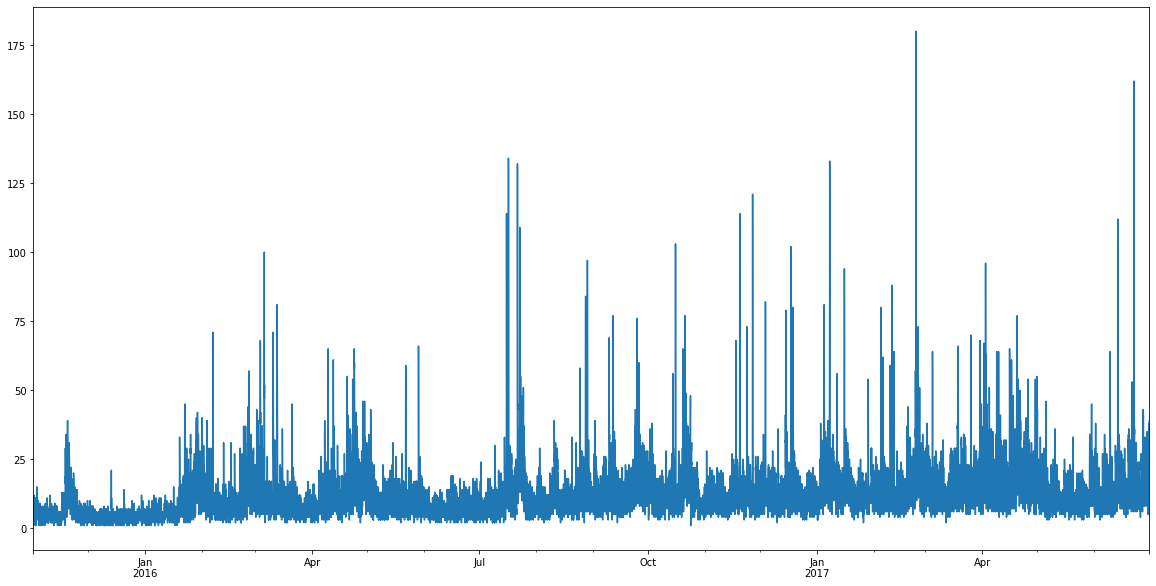

In [18]:
plt.figure(figsize=(20,10))
merged_df['Junction_3'].plot()

<AxesSubplot:>

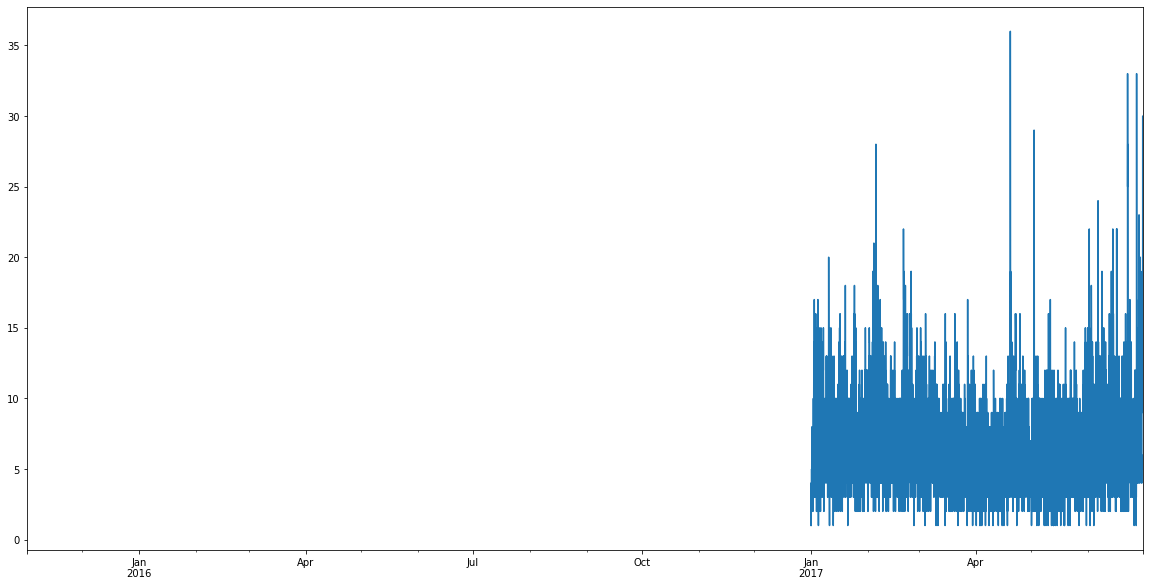

In [19]:
plt.figure(figsize=(20,10))
merged_df['Junction_4'].plot()

In [20]:
merged_df[merged_df['Junction_4'].isna()].index

DatetimeIndex(['2015-11-01 00:00:00', '2015-11-01 01:00:00',
               '2015-11-01 02:00:00', '2015-11-01 03:00:00',
               '2015-11-01 04:00:00', '2015-11-01 05:00:00',
               '2015-11-01 06:00:00', '2015-11-01 07:00:00',
               '2015-11-01 08:00:00', '2015-11-01 09:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', length=10248, freq='H')

In [21]:
merged_df['Junction_4'] = merged_df['Junction_4'].fillna(-1).astype(int)

In [22]:
merged_df.head()

,Junction_1,Junction_2,Junction_3,Junction_4
2015-11-01 00:00:00,15,6,9,-1
2015-11-01 01:00:00,13,6,7,-1
2015-11-01 02:00:00,10,5,5,-1
2015-11-01 03:00:00,7,6,1,-1
2015-11-01 04:00:00,9,7,2,-1


In [23]:
# Data sequencing function for multivariate input , univariate output , single step forecast
def multivariate_univariate_single_step(sequence,window_size):
    x, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        feature_ix = i + window_size
        label_ix = i + window_size + 1
        # check if we are beyond the sequence
        if label_ix > len(sequence):
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:feature_ix], sequence.iloc[label_ix-1]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)

In [24]:
X,y = multivariate_univariate_single_step(merged_df,window_size=3)

In [25]:
X

array([[[ 15,   6,   9,  -1],
        [ 13,   6,   7,  -1],
        [ 10,   5,   5,  -1]],

       [[ 13,   6,   7,  -1],
        [ 10,   5,   5,  -1],
        [  7,   6,   1,  -1]],

       [[ 10,   5,   5,  -1],
        [  7,   6,   1,  -1],
        [  9,   7,   2,  -1]],

       ...,

       [[ 95,  34,  38,  17],
        [105,  34,  33,  11],
        [ 96,  35,  31,  30]],

       [[105,  34,  33,  11],
        [ 96,  35,  31,  30],
        [ 90,  31,  28,  16]],

       [[ 96,  35,  31,  30],
        [ 90,  31,  28,  16],
        [ 84,  29,  26,  22]]], dtype=int64)

In [26]:
y

array([[ 7,  6,  1, -1],
       [ 9,  7,  2, -1],
       [ 6,  2,  2, -1],
       ...,
       [90, 31, 28, 16],
       [84, 29, 26, 22],
       [78, 27, 39, 12]], dtype=int64)

In [27]:
print("Shape of X: " + str(X.shape))
print("Shape of y: " + str(y.shape))

Shape of X: (14589, 3, 4)
Shape of y: (14589, 4)


In [28]:
split_ratio = 0.8
split_ix = np.floor(split_ratio * len(X)).astype(int)
train_X = X[:split_ix]
train_y = y[:split_ix]
test_X  = X[split_ix:]
test_y  = y[split_ix:]

In [29]:
print("Shape of train_X: " + str(train_X.shape))
print("Shape of train_y: " + str(train_y.shape))
print("Shape of test_X : " + str(test_X.shape))
print("Shape of test_y : " + str(test_y.shape))

Shape of train_X: (11671, 3, 4)
Shape of train_y: (11671, 4)
Shape of test_X : (2918, 3, 4)
Shape of test_y : (2918, 4)


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_train_X = scaler.fit_transform(train_X.reshape(-1, train_X.shape[-1])).reshape(train_X.shape)
scaled_test_X = scaler.transform(test_X.reshape(-1, test_X.shape[-1])).reshape(test_X.shape)

In [31]:
# Dataset
class TimeSeriesDataset(Dataset):
    def __init__(self,x,y):
        self.x = torch.tensor(x,dtype=torch.float32)
        self.y = torch.tensor(y,dtype=torch.float32)
            
    def __len__(self):
        return self.x.size(0)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [32]:
train_dataset = TimeSeriesDataset(scaled_train_X,train_y)
test_dataset = TimeSeriesDataset(scaled_test_X,test_y)

In [33]:
train_dataloader = DataLoader(train_dataset,batch_size=48,shuffle=False)
test_dataloader = DataLoader(test_dataset,batch_size=48,shuffle=False)

In [34]:
###

In [35]:
class CNN(nn.Module):
    def __init__(self,n_features,n_step):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv1d(in_channels=n_features,out_channels=10,kernel_size=1)
        self.poo1 = nn.AdaptiveMaxPool2d(1)
        self.fc1 = nn.Linear(1, 20)
        self.fc2 = nn.Linear(20, n_step)
    
    def forward(self, x):
        x = self.conv1(x)
        x = F.leaky_relu(x)
        x = self.poo1(x)
        x = x.view(-1, 1)
        x = F.leaky_relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [36]:
class Hybrid(nn.Module):
    def __init__(self,n_features,n_step,n_out,hidden_size,num_layers):
        super(Hybrid,self).__init__()
        self.n_features = n_features
        self.n_step = n_step
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.cnn = CNN(n_features,n_step)
        self.lstm = nn.LSTM(
            input_size= 1,
            hidden_size= hidden_size,
            num_layers= num_layers ,
            batch_first=True)
        self.linear = nn.Linear(hidden_size,n_out)
        
    def forward(self, x):
        # The data flow into CNN first
        c_out = self.cnn(x)
        
        # Reshape the c_out to fit in LSTM
        c_out = c_out.reshape(c_out.shape[0],c_out.shape[1],1).to(device)
        
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        # The output of CNN will flow into LSTM 
        out, (hn, cn) = self.lstm(c_out, (h0, c0))
        
        out = out[:, -1, :]
        
        out = self.linear(out)
        return out

In [37]:
n_features = X.shape[1]*X.shape[2]
n_step = 10
n_out = 4
hidden_size = 8
num_layers = 2

model = Hybrid(n_features,n_step,n_out,hidden_size,num_layers)
model = model.to(device)

In [38]:
inputs = torch.zeros((48,
                      X.shape[1]*X.shape[2] ,
                      1),dtype=torch.float).to(device) # batch size ,input_dim ,seq_length
print(summary(model,inputs))

                             Kernel Shape Output Shape Params Mult-Adds
Layer                                                                  
0_cnn.Conv1d_conv1            [12, 10, 1]  [48, 10, 1]  130.0     120.0
1_cnn.AdaptiveMaxPool2d_poo1            -   [48, 1, 1]      -         -
2_cnn.Linear_fc1                  [1, 20]     [48, 20]   40.0      20.0
3_cnn.Linear_fc2                 [20, 10]     [48, 10]  210.0     200.0
4_lstm                                  -  [48, 10, 8]  928.0     800.0
5_linear                           [8, 4]      [48, 4]   36.0      32.0
-------------------------------------------------------------------------
                      Totals
Total params          1.344k
Trainable params      1.344k
Non-trainable params     0.0
Mult-Adds             1.172k
                             Kernel Shape Output Shape  Params  Mult-Adds
Layer                                                                    
0_cnn.Conv1d_conv1            [12, 10, 1]  [48, 10, 1]   

In [39]:
torch.manual_seed(123)
num_epochs = 30
n_features = X.shape[1] * X.shape[2]
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [40]:
train_loss = np.zeros(num_epochs)
val_loss = np.zeros(num_epochs)

for t in range(num_epochs):
    running_loss_train = 0
    running_loss_valid = 0
    for _,(train_data_X,train_data_Y) in enumerate(train_dataloader):
        
        train_data_X,train_data_Y = train_data_X.to(device),train_data_Y.to(device)
        
        # Forward pass
        y_train_pred = model(train_data_X.reshape(-1,n_features,1))
        
        # Reshape to ensure the predicted output (y_train_pred) same size with train_Y shape 
        y_train_pred = torch.reshape(y_train_pred,(-1,train_data_Y.shape[1]))

        #Compare the value using MSE
        loss_train = loss_fn(y_train_pred, train_data_Y)

        # Zero out gradient, else they will accumulate between epochs
        optimizer.zero_grad()

        # Backward pass
        loss_train.backward()
        
        # Update parameters
        optimizer.step()
            
        # Summing up the loss over each epoch
        running_loss_train += loss_train.item()*train_data_X.size(0)
        
    # Average the loss base of the batch size 
    epoch_loss_train = running_loss_train /len(train_dataset)
    print("Loss on training epoch " + str(t+1) + " = " + str(epoch_loss_train))
    # Store the averaged value
    train_loss[t] = epoch_loss_train

    # Validate the test data loss
    with torch.no_grad():
        for _,(test_data_X,test_data_Y) in enumerate(test_dataloader):
            test_data_X = test_data_X.to(device)
            test_data_Y = test_data_Y.to(device)
            y_test_pred = model(test_data_X.reshape(-1,n_features,1))

            #Reshape to perform MSE 
            y_test_pred = torch.reshape(y_test_pred,(-1,test_data_Y.shape[1]))
                
            # Calculate the loss
            loss_test = loss_fn(y_test_pred, test_data_Y)
                
            # Summing up the loss over each epoch
            running_loss_valid += loss_test.item()*test_data_X.size(0)
            
    #  Average the loss base of the batch size
    epoch_loss_test =running_loss_valid /len(test_dataset)
    print("Loss on testing epoch " + str(t+1) + " = " + str(epoch_loss_test))
    #  Store the averaged value
    val_loss[t] = epoch_loss_test

Loss on training epoch 1 = 268.60952910971656
Loss on testing epoch 1 = 617.1369004749614
Loss on training epoch 2 = 136.74488593107958
Loss on testing epoch 2 = 436.72539538565854
Loss on training epoch 3 = 124.8301837239001
Loss on testing epoch 3 = 376.4580065261182
Loss on training epoch 4 = 127.22177762105179
Loss on testing epoch 4 = 356.6999501783281
Loss on training epoch 5 = 128.94149700978986
Loss on testing epoch 5 = 349.887055698366
Loss on training epoch 6 = 129.5902785424677
Loss on testing epoch 6 = 347.1229148483015
Loss on training epoch 7 = 121.07736137415631
Loss on testing epoch 7 = 317.8607561138904
Loss on training epoch 8 = 58.37985387476415
Loss on testing epoch 8 = 239.26072373890239
Loss on training epoch 9 = 46.66977354567254
Loss on testing epoch 9 = 194.2710769161776
Loss on training epoch 10 = 40.728144893853795
Loss on testing epoch 10 = 164.25996351863031
Loss on training epoch 11 = 37.83398584649063
Loss on testing epoch 11 = 143.80850096317576
Loss on 

In [41]:
print("Last training loss: " + str(train_loss[-1]))
print("Last testing loss: " + str(val_loss[-1]))

Last training loss: 31.04111493950423
Last testing loss: 57.88948876928025


In [42]:
predictions = []
with torch.no_grad():
    for test_data_X in scaled_test_X:
        inp = torch.Tensor(test_data_X)
        inp = inp.to(device)
        y_pred = model(inp.reshape(-1,n_features,1))
        predictions.append(y_pred.cpu().numpy()[0])

In [43]:
prediction_df = pd.DataFrame(predictions)
actual_df = pd.DataFrame(test_y)

In [44]:
prediction_df

,0,1,2,3
0,76.226151,19.254585,21.918221,6.289693
1,82.420456,21.314871,23.900511,9.014886
2,88.989227,23.466335,25.919676,11.747671
3,89.295090,23.565477,26.013702,11.874636
4,78.678802,19.941208,22.666393,7.255371
...,...,...,...,...
2913,92.220337,24.534304,26.910009,13.091156
2914,92.686401,24.676058,27.046473,13.269221
2915,92.599243,24.649843,27.021088,13.236266
2916,90.755203,24.057404,26.467249,12.495764


In [45]:
actual_df

,0,1,2,3
0,74,21,16,4
1,84,25,27,10
2,87,22,29,9
3,78,23,19,7
4,82,27,30,9
...,...,...,...,...
2913,105,34,33,11
2914,96,35,31,30
2915,90,31,28,16
2916,84,29,26,22


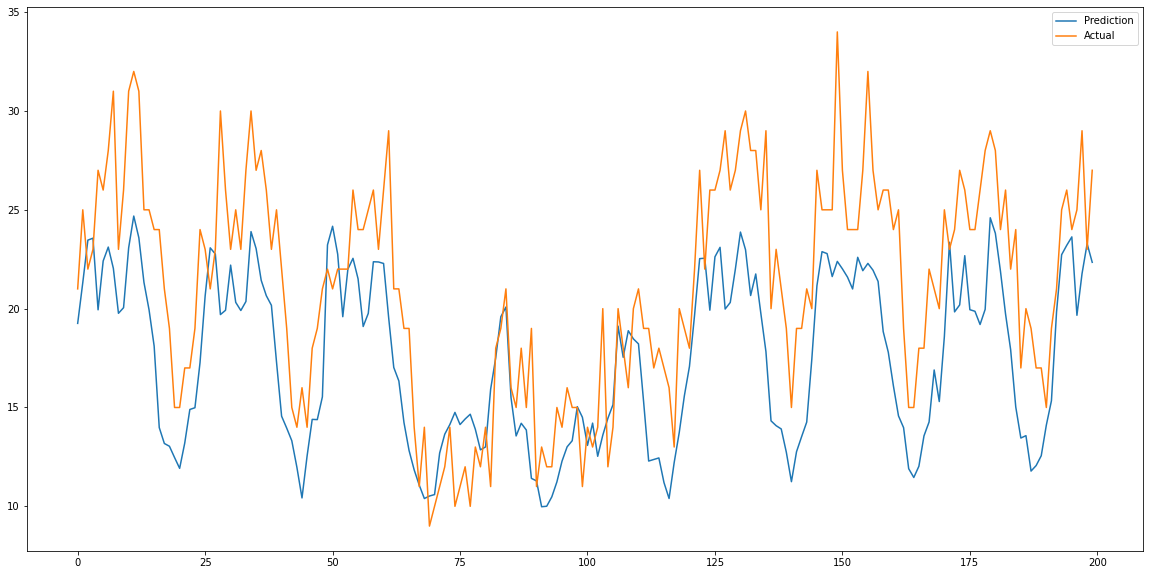

In [46]:
plt.figure(figsize=(20,10))
prediction_df[1][:200].plot(legend=True)
actual_df[1][:200].plot(legend=True)
plt.legend(["Prediction", "Actual"]);

<AxesSubplot:>

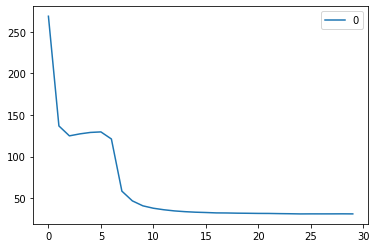

In [47]:
pd.DataFrame(train_loss).plot()

<AxesSubplot:>

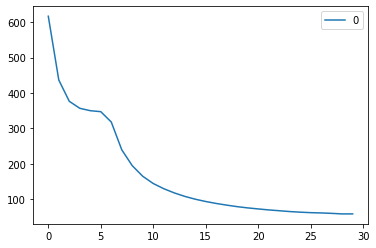

In [48]:
pd.DataFrame(val_loss).plot()